## David Aponte

## Analysis of Behavioral Survey (CDC)

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() #setting seaborn
%matplotlib inline

In [101]:
data = pd.read_csv('cdc.csv')
data.sample(5)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
4805,good,1,1,0,67,160,152,44,m
8746,very good,0,1,0,66,138,138,26,f
6697,very good,1,1,0,74,185,200,31,m
17751,very good,0,1,0,60,100,100,86,f
19574,very good,1,0,1,74,195,185,24,m


In [102]:
data.shape

(20000, 9)

In [103]:
#data appears to be clean
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
genhlth     20000 non-null object
exerany     20000 non-null int64
hlthplan    20000 non-null int64
smoke100    20000 non-null int64
height      20000 non-null int64
weight      20000 non-null int64
wtdesire    20000 non-null int64
age         20000 non-null int64
gender      20000 non-null object
dtypes: int64(7), object(2)
memory usage: 1.2+ MB


In [6]:
#summary stats of variables
data.describe()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,0.745700,0.873800,0.472050,67.182900,169.68295,155.093850,45.068250
std,0.435478,0.332083,0.499231,4.125954,40.08097,32.013306,17.192689
min,0.000000,0.000000,0.000000,48.000000,68.00000,68.000000,18.000000
25%,0.000000,1.000000,0.000000,64.000000,140.00000,130.000000,31.000000
50%,1.000000,1.000000,0.000000,67.000000,165.00000,150.000000,43.000000
75%,1.000000,1.000000,1.000000,70.000000,190.00000,175.000000,57.000000
max,1.000000,1.000000,1.000000,93.000000,500.00000,680.000000,99.000000


## Variables

genhlth: A categorical variable indicating general health. The categories are excellent, very good, good, fair, and poor.

exerany: A categorical variable. 1 if the respondent exercised in the past month and 0 otherwise.

hlthplan: A categorical variable. 1 if the respondent has some form of health coverage and 0 otherwise.

smoke100: A categorical variable. 1 if the respondent has smoked at least 100 cigarettes in their entire life and 0 otherwise.

height: A numerical-continuous variable where the respondent's height in inches.

weight: A numerical-continuous variable, respondent's weight in pounds.

wtdesire: A numerical-continuous variable, respondent's desired weight in pounds.

age: A numerical-discrete variable, respondent's age in years.

gender: A categorical variable, respondent's gender.

In [7]:
#20,000 cases 
#9 variables
data.shape

(20000, 9)

In [8]:
data.columns

Index(['genhlth', 'exerany', 'hlthplan', 'smoke100', 'height', 'weight',
       'wtdesire', 'age', 'gender'],
      dtype='object')

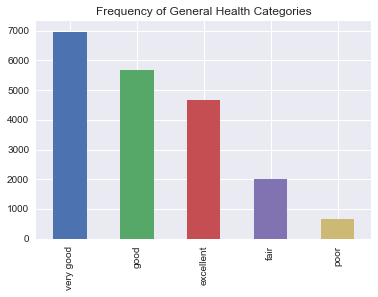

In [104]:
#value frequency of general health
data.genhlth.value_counts().plot.bar()
plt.title('Frequency of General Health Categories')
plt.show()

In [10]:
data.genhlth.value_counts()/20000
#34.9% of the repondents reported that their health was very good

very good    0.34860
good         0.28375
excellent    0.23285
fair         0.10095
poor         0.03385
Name: genhlth, dtype: float64

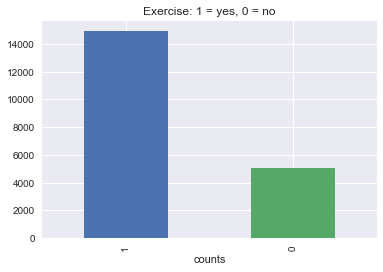

In [105]:
#visuzalizing the distributions
data.exerany.value_counts().plot.bar()
plt.title('Exercise: 1 = yes, 0 = no')
plt.xlabel('counts')
plt.show()
#most people claim to exercise

In [12]:
data.exerany.value_counts()

1    14914
0     5086
Name: exerany, dtype: int64

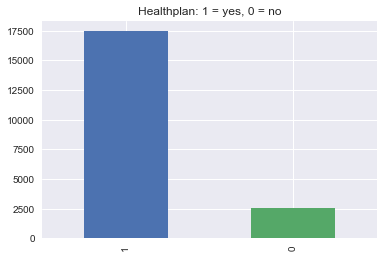

In [106]:
data.hlthplan.value_counts().plot.bar()
plt.title('Healthplan: 1 = yes, 0 = no')
plt.show()
#most people report having some sort of health insurance

In [14]:
data.hlthplan.value_counts()
#17,476 have healthcare
#2,524
#nearly 7 times as many people report to have healthcare

1    17476
0     2524
Name: hlthplan, dtype: int64

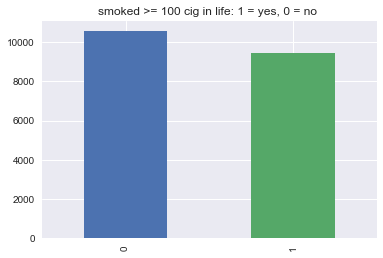

In [107]:
data.smoke100.value_counts().plot.bar()
plt.title('smoked >= 100 cig in life: 1 = yes, 0 = no ')
plt.show()
#the distrbution for smokers and non-smokers seems to be uniform

In [16]:
data.smoke100.value_counts()
#10,559 claimed to smoke less than 100 cigarettes
#9,441 smoked over a 100 cigarettes

0    10559
1     9441
Name: smoke100, dtype: int64

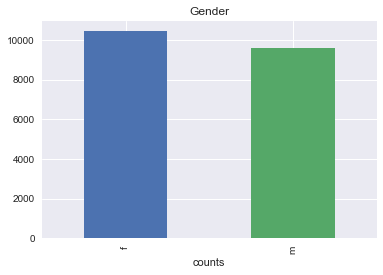

In [108]:
data.gender.value_counts().plot.bar()
plt.title('Gender')
plt.xlabel('counts')
plt.show()
#fairly even sample of male and female respondents of the survey

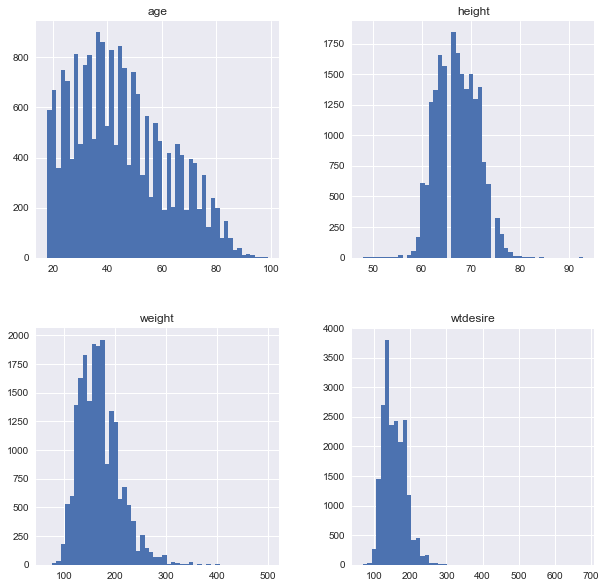

In [109]:
#distribution of numerical data
data[['height','weight','wtdesire','age']].hist(figsize=(10,10), bins=50)
plt.show()
#age is unimodal and right skewed - most of the respondents are over 40
#height is unimodal and symmetric
#weight is unimodal and right skewed - most of the respondents are above 150
#wt desire is unimodal very slightly right skewed - most of the respondents have a positive weight desire

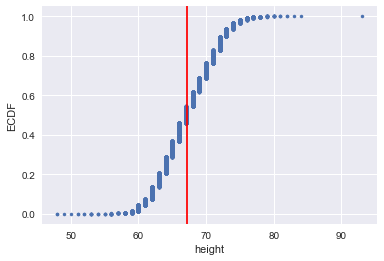

In [110]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y
x, y = ecdf(data['height'])
plt.plot(x,y, marker='.', linestyle='none')
plt.axvline(data['height'].mean(), color='r')
plt.xlabel('height')
plt.ylabel('ECDF')
plt.show()

In [19]:
data[['weight','height']].corr()
#positive association between weight and height

,weight,height
weight,1.000000,0.555322
height,0.555322,1.000000


c:\users\apont\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


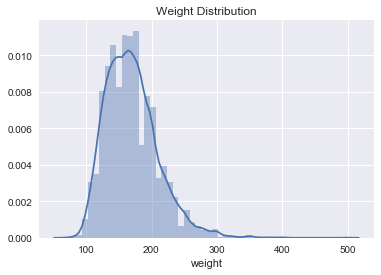

In [111]:
#visualizing the distribution of weight 
sns.distplot(data.weight)
plt.title('Weight Distribution')
plt.show()
#weight is unimodal and right skewed

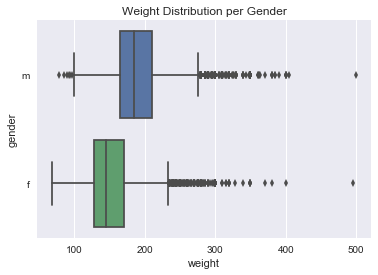

In [112]:
#looking for weight outliers
sns.boxplot('weight','gender',data=data)
plt.title('Weight Distribution per Gender')
plt.show()
#the weights > 400 are either mistakes or obese persons
#males have higher median weight than females

c:\users\apont\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


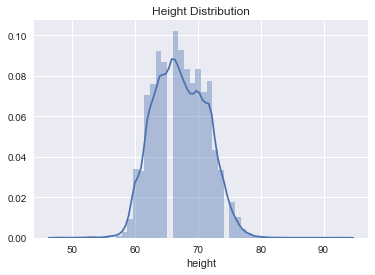

In [113]:
sns.distplot(data.height)
plt.title('Height Distribution')
plt.show()
#height is unimodal and symmetric

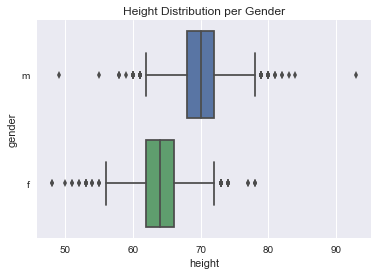

In [114]:
#looking for outliers
sns.boxplot('height','gender',data=data)
plt.title('Height Distribution per Gender')
plt.show()
#someone over 90 inches (7.5 feet) is either a mistake or
#an extremely tall person
#someone below 50 inches is either a mistake of a very short person
#males have higher median height than females

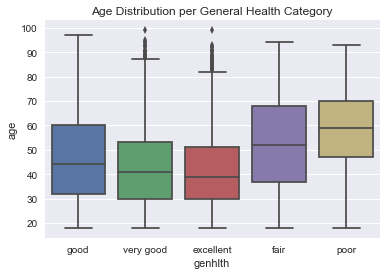

In [115]:
sns.boxplot('genhlth', 'age',data=data)
plt.title('Age Distribution per General Health Category')
plt.show()
#it appears that the older the population, the poorer the health
#possible negative association between age and health

If I wanted to explore the association between how people view their health and age, I could tranform the genhlth variable into a ranking (1 for excellent, 5 for poor).

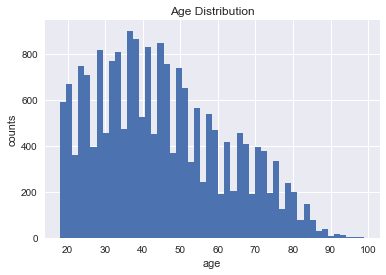

In [116]:
#distribution of age
plt.hist(data.age, bins=50)
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('counts')
plt.show()
#age is unimodal and right skewed

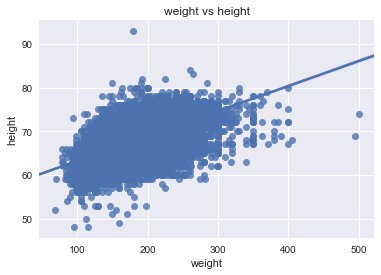

In [117]:
sns.regplot('weight','height',data=data)
plt.title('weight vs height')
plt.show()
#visualizing height and weight

## numerical summary for height and age, and interquantile range
## height:
- IQR = 6
- mean = 67.2 inches
- std = 4.1 inches
- median = 67 inches

## age:
- IQR = 26
- mean = 45 years old
- std = 17 years
- median = 43 years old

## relative frequency of gender:
- 52% female 10,431
- 48% male 9,569

## relative frequency of exerany:
- 75% exercise
- 25% do not exercise

## proportion of genhlth:
- 34.9% say very good    
- 28.4% say good        
- 23.3% say excellent  
- 10.1% say fair         
- 3.4% say poor         



In [27]:
data.height.describe()
#IQR = 70 - 64 = 6
#mean 67.2 inches
#std 4.1 inches
#median 67 inches

count    20000.000000
mean        67.182900
std          4.125954
min         48.000000
25%         64.000000
50%         67.000000
75%         70.000000
max         93.000000
Name: height, dtype: float64

In [28]:
data.age.describe()
#IQR = 57 - 31 = 26
#mean 45 years old
#std 17 years
#median 43 years old

count    20000.000000
mean        45.068250
std         17.192689
min         18.000000
25%         31.000000
50%         43.000000
75%         57.000000
max         99.000000
Name: age, dtype: float64

In [29]:
#calculating relative frequency of gender
data.gender.value_counts()/20000
#52% of the sample was female
#48% was male

f    0.52155
m    0.47845
Name: gender, dtype: float64

In [30]:
#relative frequency of exerany
data.exerany.value_counts()/20000
#75% of the population exercises
#25% do not exercise

1    0.7457
0    0.2543
Name: exerany, dtype: float64

In [31]:
data.gender.value_counts()
#there are 9,569 males

f    10431
m     9569
Name: gender, dtype: int64

In [32]:
#relative frequency of genhlth
data.genhlth.value_counts()/20000
#23% say they are in excellent health

very good    0.34860
good         0.28375
excellent    0.23285
fair         0.10095
poor         0.03385
Name: genhlth, dtype: float64

In [33]:
#average weight per genhlth
data.groupby('genhlth').weight.mean().sort_values(ascending=False)
#looking at the average weight of each reported general health category
#poor health had higher weight

genhlth
poor         176.844904
fair         176.177811
good         173.214097
very good    169.211417
excellent    162.228903
Name: weight, dtype: float64

In [34]:
#average height per genhlth
data.groupby('genhlth').height.mean().sort_values(ascending=False)
#looking at the average height per genhlth
#excellent health had higher heights

genhlth
excellent    67.560447
very good    67.435456
good         67.014978
fair         66.257553
poor         66.152142
Name: height, dtype: float64

In [35]:
#weight stats per genhlth category
data.groupby('genhlth').weight.describe()

,count,mean,std,min,25%,50%,75%,max
genhlth,,,,,,,,
excellent,4657.0,162.228903,34.750603,85.0,135.0,160.0,185.0,400.0
fair,2019.0,176.177811,45.744200,78.0,144.0,170.0,200.0,495.0
good,5675.0,173.214097,42.014648,68.0,142.0,170.0,200.0,400.0
poor,677.0,176.844904,50.262193,79.0,142.0,170.0,200.0,500.0
very good,6972.0,169.211417,38.079130,82.0,140.0,165.0,190.0,360.0


In [36]:
#height stats per genhlth category
data.groupby('genhlth').height.describe()

,count,mean,std,min,25%,50%,75%,max
genhlth,,,,,,,,
excellent,4657.0,67.560447,4.031961,54.0,64.0,67.0,71.0,83.0
fair,2019.0,66.257553,4.101903,49.0,63.0,66.0,69.0,79.0
good,5675.0,67.014978,4.172136,50.0,64.0,67.0,70.0,84.0
poor,677.0,66.152142,4.144457,53.0,63.0,66.0,69.0,80.0
very good,6972.0,67.435456,4.091795,48.0,64.0,67.0,71.0,93.0


In [37]:
#average weight per hlthplan
data.groupby('hlthplan').weight.mean().sort_values(ascending=False)

hlthplan
1    169.894484
0    168.218304
Name: weight, dtype: float64

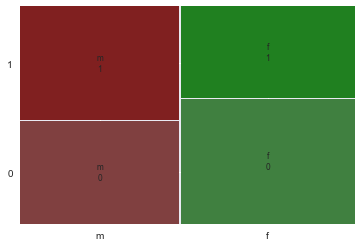

In [118]:
gender_smoke = data[['gender', 'smoke100']]
from statsmodels.graphics.mosaicplot import mosaic
#visualizing the distribution of smokers and gender
#mosaic plot
mosaic(gender_smoke, index=['gender','smoke100'])
plt.show()


The mosaic plot reveals that more males have smoked at least 100 cigarettes in their lifetime than females.

In [60]:
data.groupby('gender').smoke100.value_counts()

gender  smoke100
f       0           6012
        1           4419
m       1           5022
        0           4547
Name: smoke100, dtype: int64

Im going to filter only the rows that are smokers and under 23, then I am going to take the count using value_counts() pandas function get a figure. I then divided that count by the total respondents and multiplied it by 100 to give me a percentage.

In [64]:
under23_and_smoke = data[(data.smoke100 == 1) & (data.age < 23)]
under23_and_smoke.count()/len(data) * 100
#620, 3.1% of the sample are under 23 and smoke

genhlth     3.1
exerany     3.1
hlthplan    3.1
smoke100    3.1
height      3.1
weight      3.1
wtdesire    3.1
age         3.1
gender      3.1
dtype: float64


I chose to view the BMI and exercise varibles. The boxplot revealed that their distrubutions are fairly uniform - therefore, they dont tell us much.

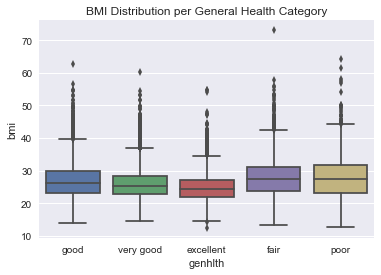

In [120]:
bmi = data.weight/data.height**2 * 703
data['bmi'] = bmi
sns.boxplot(data.genhlth, data.bmi)
plt.title('BMI Distribution per General Health Category')
plt.show()

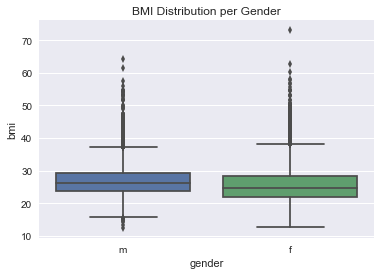

In [122]:
#BMI and gender boxplot
sns.boxplot(data.gender, data.bmi)
plt.title('BMI Distribution per Gender')
plt.show()

In [67]:
#average female BMI is 25.7
#average male BMI is 26.9
data.pivot_table(index='gender',values='bmi')

,bmi
gender,
f,25.741147
m,26.923670


In [69]:
data.groupby('gender').bmi.mean()

gender
f    25.741147
m    26.923670
Name: bmi, dtype: float64

In [73]:
male_mean = 26.923670
female_mean = 25.741147
mean_diff = male_mean - female_mean

mean_diff

1.1825229999999998

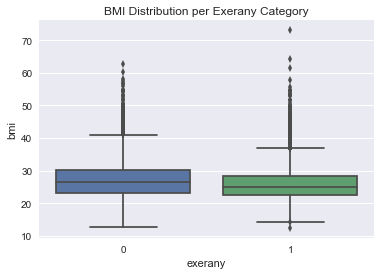

In [123]:
#boxplot of BMI and exercise
sns.boxplot('exerany','bmi', data=data)
plt.title('BMI Distribution per Exerany Category')
plt.show()

## scatterplot of weight versus desired weight.

The scatterplots shows a strong positive relationship (0.8) between weight and desired weight. 

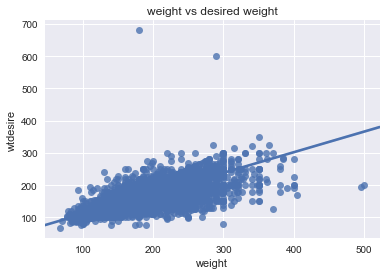

In [125]:
#exploring the relationship between desired weight and actual weight
sns.regplot('weight', 'wtdesire', data=data)
plt.title('weight vs desired weight')
plt.show()
#positive relationship

In [75]:
data[['wtdesire','weight']].corr()
#strong positive correlation of 0.8

,wtdesire,weight
wtdesire,1.000000,0.800052
weight,0.800052,1.000000


## Let’s consider a new variable: the difference between desired weight (wtdesire) and current weight (weight). 

In [129]:
wdiff = data.wtdesire - data.weight
data['wdiff'] = wdiff


wdiff is numerical continuous data. If an observation of wdiff is 0 then the persons actual weight isnt different than their desired weight - i.e. they are happy with their current weight. If wdiff is negative, that persons actual weight exceeds their desired weight. If wdiff is positive, that persons desired weight exceeds their actual weight.


The distribution is slightly skewed to the left. This tell us that most people would like to weigh less than they currently weigh.

c:\users\apont\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


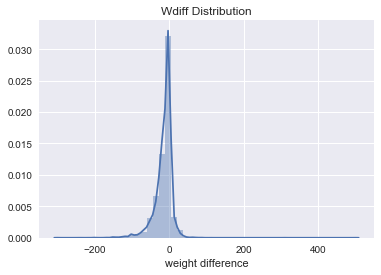

In [130]:
sns.distplot(wdiff, bins=50)
plt.title('Wdiff Distribution')
plt.xlabel('weight difference')
plt.show()
#wdiff is unimodal and very slightly left skewed

In [ ]:
plt.hist(wdiff, bins=30)
#slight left skew



Looking at the box plot, it appears that females have a larger box (IQR) and a smaller median wdiff. Because the median wdiff is greater for men than women, it tells me that more women are dissatified with their current weight than men.

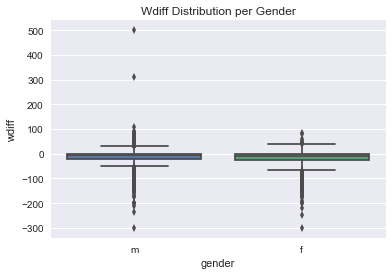

In [131]:
sns.boxplot('gender', 'wdiff', data=data)
plt.title('Wdiff Distribution per Gender')
plt.show()
#slightly more women would like to weigh less than their actual weight

In [ ]:
data.groupby('gender').wdiff.mean()


71.9% of the people are within one standard deviation of the mean. This seems like the sample of respondents have a fairly normal distribution of weight.

In [79]:
data.weight.describe()
#mean weight of 169.7 lbs.
#std of +/- 40.1 lbs.
one_std_plus = data.weight.mean() + data.weight.std()
#one_std_plus is 209.8
one_std_minus = data.weight.mean() - data.weight.std()
#one_std_minus is 129.6

In [80]:
one_std_from_mean = data[(data.weight >= 126.6) & (data.weight <= 209.8)].count()/20000 * 100
one_std_from_mean
#71.9% are within ones standard deviation away from the mean

genhlth     71.925
exerany     71.925
hlthplan    71.925
smoke100    71.925
height      71.925
weight      71.925
wtdesire    71.925
age         71.925
gender      71.925
bmi         71.925
wdiff       71.925
dtype: float64